In [1]:
using Dates, JuMP, Gurobi, Plots, Logging

push!(LOAD_PATH, dirname(@__DIR__))
using ShelfSpaceAllocation

# --- Arguments ---
time_limit = 5*60 # Seconds
mip_gap = 0.05
case = "small"
product_path = joinpath(@__DIR__, "instances", case, "products.csv")
shelf_path = joinpath(@__DIR__, "instances", case, "shelves.csv");
# ---

In [2]:
parameters = load_parameters(product_path, shelf_path)
(products, shelves, blocks, modules, P_b, S_m, G_p, H_s, L_p, P_ps, D_p,
    N_p_min, N_p_max, W_p, W_s, M_p, M_s_min, M_s_max, R_p, L_s, H_p, SK_p, SL, 
    empty_space_penalty, shortage_penalty, shelf_up_down_penalty) = parameters;

In [3]:
model = shelf_space_allocation_model(
    products, shelves, blocks, modules, P_b, S_m, G_p, H_s, L_p, P_ps, D_p,
    N_p_min, N_p_max, W_p, W_s, M_p, M_s_min, M_s_max, R_p, L_s, H_p, SL,
    empty_space_penalty, shortage_penalty, shelf_up_down_penalty);

In [4]:
optimizer = with_optimizer(
    Gurobi.Optimizer,
    TimeLimit=time_limit,
    MIPFocus=3,
    MIPGap=mip_gap,
)
optimize!(model, optimizer)

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Optimize a model with 3480 rows, 1502 columns and 14071 nonzeros
Variable types: 355 continuous, 1147 integer (321 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+03]
  Objective range  [9e-05, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 7e+03]
Found heuristic solution: objective 38842.949017
Presolve removed 1299 rows and 146 columns
Presolve time: 0.02s
Presolved: 2181 rows, 1356 columns, 10959 nonzeros
Variable types: 223 continuous, 1133 integer (307 binary)
Presolve removed 118 rows and 118 columns
Presolved: 2063 rows, 1238 columns, 9897 nonzeros


Root relaxation: objective 5.752760e+03, 1868 iterations, 0.07 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 5752.75993    0  181 38842.9490 5752.75993  85.2%     -    0s
H    0   

In [5]:
variables = extract_variables(model)
objectives = extract_objectives(parameters, variables)
n_ps = variables[:n_ps]
s_p = variables[:s_p]
o_s = variables[:o_s]
b_bs = variables[:b_bs]
x_bs = variables[:x_bs]
z_bs = variables[:z_bs];

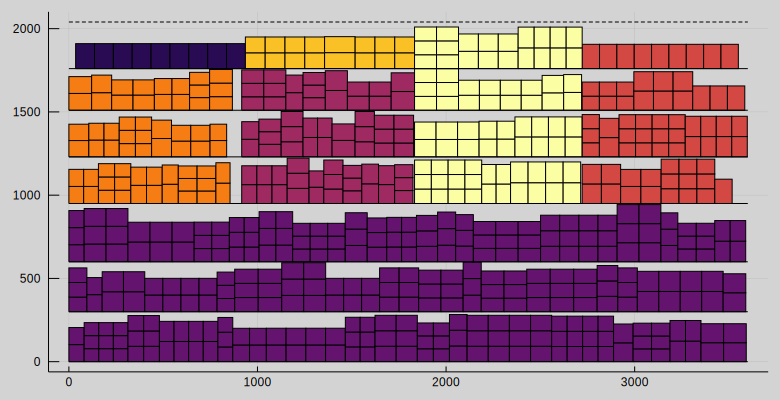

In [6]:
p1 = planogram(products, shelves, blocks, S_m, P_b, H_s, H_p, W_p, W_s, SK_p, n_ps, o_s, x_bs)
p1[1]

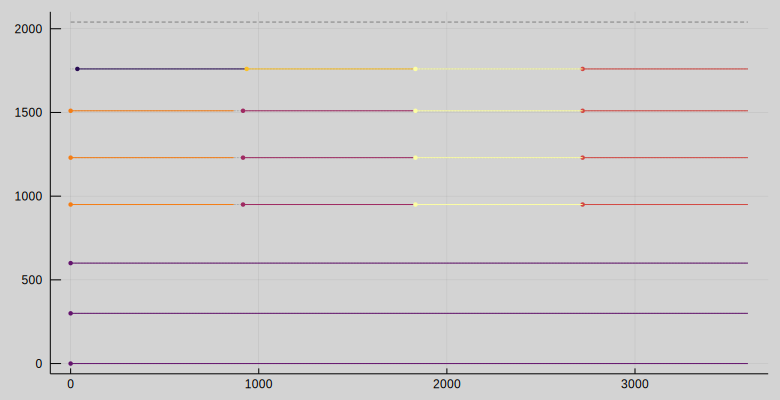

In [7]:
p2 = block_allocation(shelves, blocks, S_m, H_s, W_s, b_bs, x_bs, z_bs)
p2[1]

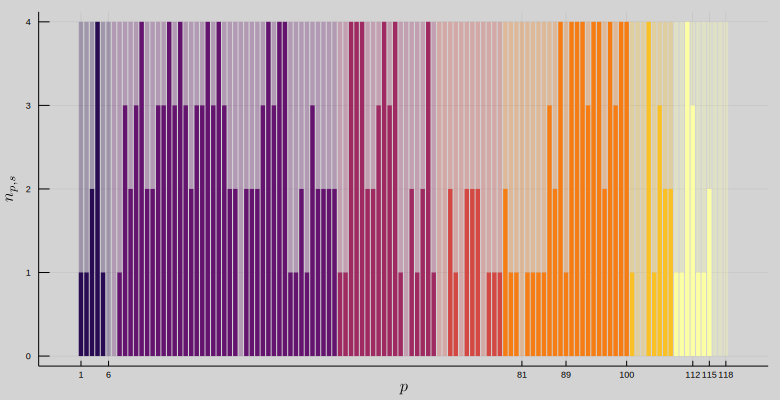

In [8]:
p3 = product_facings(products, shelves, blocks, P_b, N_p_max, n_ps)

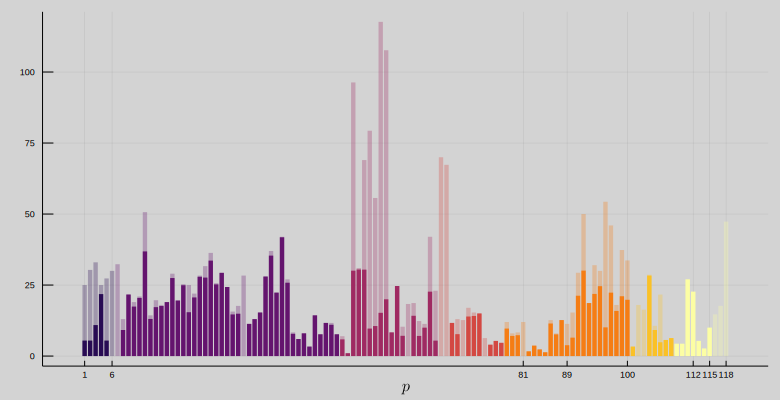

latex: failed to create a dvi file
latex: failed to create a dvi file
latex: failed to create a dvi file
latex: failed to create a dvi file


In [12]:
p4 = demand_and_sales(blocks, P_b, D_p, s_p)

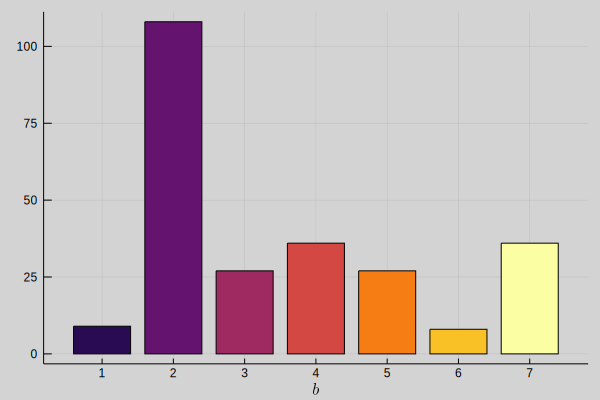

In [9]:
p5 = fill_amount(shelves, blocks, P_b, n_ps)

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


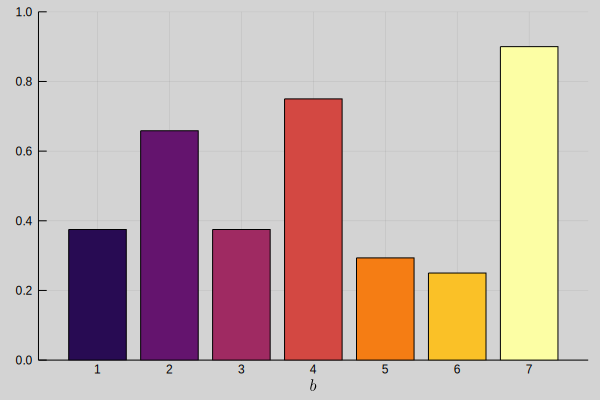

In [10]:
p6 = fill_percentage(
    n_ps, products, shelves, blocks, modules, P_b, S_m, G_p, H_s, L_p, P_ps,
    D_p, N_p_min, N_p_max, W_p, W_s, M_p, M_s_min, M_s_max, R_p, L_s, H_p,
    with_optimizer(Gurobi.Optimizer, TimeLimit=60, LogToConsole=false));
p6